In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


from networkx.algorithms import community

# Graphical Representations of Data

In [2]:
data_endpoint = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS6EqRuTDVTI1ClwCusN3a7D96p7EbwcmvC4u0Lqj4poN93AyHa6JNXiPaN84AlZUPpqDkoKNlBV0A5/pub?gid=0&single=true&output=csv'
A = pd.read_csv(data_endpoint, header=0, index_col=0)  
A.fillna(0, inplace=True)  
A.head()

,Tyson,Tovio,Erin,Kevin,Nei,Amelia,David,Sean,Steven,Marshall,...,Alex,Michael_B,Richard,John,Michael_M,Doster,Christopher_S,Damien,Christopher_W,Frank
Students,,,,,,,,,,,,,,,,,,,,,
Tyson,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0,0.0,1.0,1.0,0.0
Tovio,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,...,0.0,1.0,1.0,0.0,1.0,1,1.0,0.0,0.0,0.0
Erin,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1,...,0.0,0.0,0.0,1.0,1.0,1,1.0,1.0,0.0,1.0
Kevin,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,...,1.0,0.0,1.0,1.0,1.0,1,1.0,1.0,0.0,1.0
Nei,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,1.0


In [3]:
G = nx.from_numpy_matrix(A.values)
G = nx.from_pandas_adjacency(A)
G

In [4]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Michael_A', 19),
 ('Damien', 19),
 ('Frank', 19),
 ('Kevin', 18),
 ('Michael_M', 18),
 ('Sean', 17),
 ('Alex', 17),
 ('Michael_B', 17),
 ('Doster ', 17),
 ('Erin', 16),
 ('Garrett', 16),
 ('Amelia', 15),
 ('Marshall ', 15),
 ('Drew ', 15),
 ('Christopher_S', 15),
 ('Tovio', 14),
 ('John', 12),
 ('Christopher_W', 12),
 ('Richard', 10),
 ('David', 8),
 ('Steven', 8),
 ('Tyson', 6),
 ('Nei', 5)]

In [5]:
def sort_nodes_by_centrality(centrality_dict):
    import operator
    m = len(centrality_dict) - 1
    sorted_by_centrality = sorted(centrality_dict.items(), key=operator.itemgetter(1), reverse=True)
    return [{k: int(v*m)} for k,v in sorted_by_centrality]

[{'Michael_A': 19}, {'Damien': 19}, {'Frank': 19}, {'Kevin': 18}, {'Michael_M': 18}, {'Sean': 17}, {'Alex': 17}, {'Michael_B': 17}, {'Doster ': 17}, {'Erin': 16}, {'Garrett': 16}, {'Amelia': 15}, {'Marshall ': 15}, {'Drew ': 15}, {'Christopher_S': 15}, {'Tovio': 14}, {'John': 12}, {'Christopher_W': 12}, {'Richard': 10}, {'David': 8}, {'Steven': 8}, {'Tyson': 6}, {'Nei': 5}]


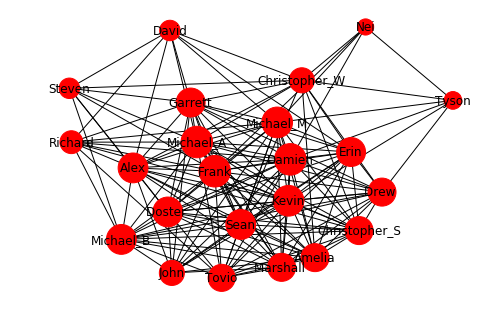

In [6]:
degree = nx.degree_centrality(G)
print(sort_nodes_by_centrality(degree))

visual_scalar = 50 * G.number_of_nodes()
nx.draw_kamada_kawai(G, with_labels=True, node_size=[val*visual_scalar for val in degree.values()])

[{'Michael_M': 1}, {'Damien': 0}, {'Frank': 0}, {'Christopher_W': 0}, {'Michael_A': 0}, {'Alex': 0}, {'Kevin': 0}, {'Garrett': 0}, {'Erin': 0}, {'Drew ': 0}, {'Michael_B': 0}, {'Doster ': 0}, {'Sean': 0}, {'Amelia': 0}, {'Christopher_S': 0}, {'Richard': 0}, {'Tovio': 0}, {'Marshall ': 0}, {'David': 0}, {'Steven': 0}, {'Tyson': 0}, {'Nei': 0}, {'John': 0}]


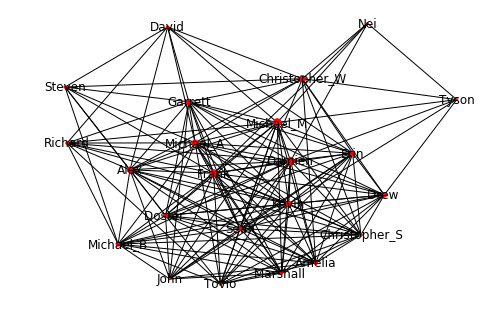

In [7]:
betweenness = nx.betweenness_centrality(G)
print(sort_nodes_by_centrality(betweenness))
nx.draw_kamada_kawai(G, with_labels=True, node_size=[val*visual_scalar for val in betweenness.values()])

[{'Frank': 5}, {'Michael_A': 5}, {'Damien': 5}, {'Kevin': 5}, {'Sean': 5}, {'Doster ': 5}, {'Michael_M': 5}, {'Alex': 5}, {'Michael_B': 5}, {'Erin': 5}, {'Marshall ': 4}, {'Christopher_S': 4}, {'Amelia': 4}, {'Garrett': 4}, {'Drew ': 4}, {'Tovio': 4}, {'John': 4}, {'Richard': 3}, {'Christopher_W': 3}, {'Steven': 2}, {'David': 2}, {'Tyson': 1}, {'Nei': 1}]


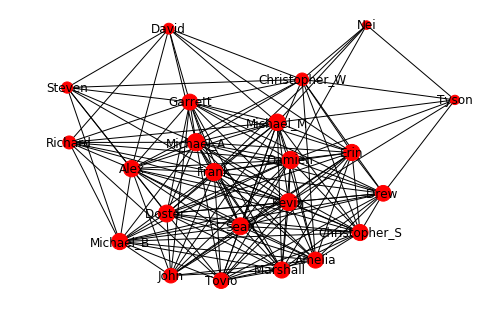

In [8]:
eigenvector = nx.eigenvector_centrality(G)
print(sort_nodes_by_centrality(eigenvector))
nx.draw_kamada_kawai(G, with_labels=True, node_size=[val*visual_scalar for val in eigenvector.values()])

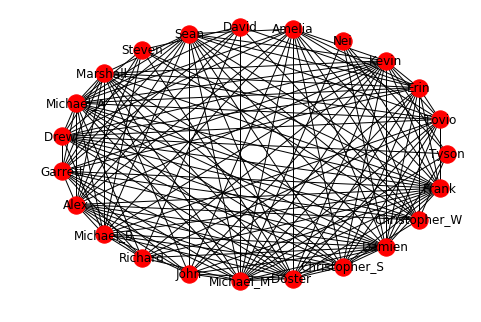

In [9]:
nx.draw_circular(G, with_labels=True)

# Search Algorithms and Community Detection

In [10]:
communities_generator = community.girvan_newman(G)

In [11]:
sorted(map(sorted, next(communities_generator)))

[['Alex',
  'Amelia',
  'Christopher_S',
  'Christopher_W',
  'Damien',
  'David',
  'Doster ',
  'Drew ',
  'Erin',
  'Frank',
  'Garrett',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_A',
  'Michael_B',
  'Michael_M',
  'Richard',
  'Sean',
  'Steven',
  'Tovio',
  'Tyson'],
 ['Nei']]

In [12]:
sorted(map(sorted, next(communities_generator)))

[['Alex',
  'Amelia',
  'Christopher_S',
  'Christopher_W',
  'Damien',
  'David',
  'Doster ',
  'Drew ',
  'Erin',
  'Frank',
  'Garrett',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_A',
  'Michael_B',
  'Michael_M',
  'Richard',
  'Sean',
  'Steven',
  'Tovio'],
 ['Nei'],
 ['Tyson']]

In [13]:
sorted(map(sorted, next(communities_generator)))

[['Alex',
  'Amelia',
  'Christopher_S',
  'Christopher_W',
  'Damien',
  'Doster ',
  'Drew ',
  'Erin',
  'Frank',
  'Garrett',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_A',
  'Michael_B',
  'Michael_M',
  'Richard',
  'Sean',
  'Steven',
  'Tovio'],
 ['David'],
 ['Nei'],
 ['Tyson']]

In [14]:
sorted(map(sorted, next(communities_generator)))

[['Alex',
  'Amelia',
  'Christopher_S',
  'Christopher_W',
  'Damien',
  'Doster ',
  'Drew ',
  'Erin',
  'Frank',
  'Garrett',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_A',
  'Michael_B',
  'Michael_M',
  'Richard',
  'Sean',
  'Tovio'],
 ['David'],
 ['Nei'],
 ['Steven'],
 ['Tyson']]

In [15]:
sorted(map(sorted, next(communities_generator)))

[['Alex',
  'Amelia',
  'Christopher_S',
  'Damien',
  'Doster ',
  'Drew ',
  'Erin',
  'Frank',
  'Garrett',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_A',
  'Michael_B',
  'Michael_M',
  'Richard',
  'Sean',
  'Tovio'],
 ['Christopher_W'],
 ['David'],
 ['Nei'],
 ['Steven'],
 ['Tyson']]

In [27]:
sorted(map(sorted, next(communities_generator)))

[['Alex'],
 ['Amelia'],
 ['Christopher_S', 'Damien', 'Doster ', 'Frank', 'Michael_A', 'Michael_M'],
 ['Christopher_W'],
 ['David'],
 ['Drew '],
 ['Erin'],
 ['Garrett'],
 ['John'],
 ['Kevin'],
 ['Marshall '],
 ['Michael_B'],
 ['Nei'],
 ['Richard'],
 ['Sean'],
 ['Steven'],
 ['Tovio'],
 ['Tyson']]

In [28]:
partition = community.kernighan_lin_bisection(G)  # compute communities
partition

({'Alex',
  'Christopher_W',
  'David',
  'Frank',
  'Garrett',
  'Michael_A',
  'Michael_M',
  'Nei',
  'Richard',
  'Steven',
  'Tyson'},
 {'Amelia',
  'Christopher_S',
  'Damien',
  'Doster ',
  'Drew ',
  'Erin',
  'John',
  'Kevin',
  'Marshall ',
  'Michael_B',
  'Sean',
  'Tovio'})

In [29]:
cliques = nx.algorithms.find_cliques(G)


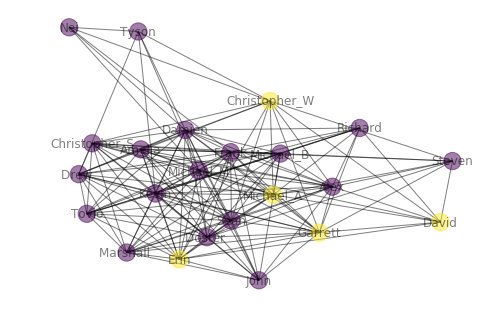

In [32]:
clique = next(cliques)
nx.draw(G, with_labels=True, alpha=0.5, node_color=[1 if node in clique else 0 for node in G.nodes()])

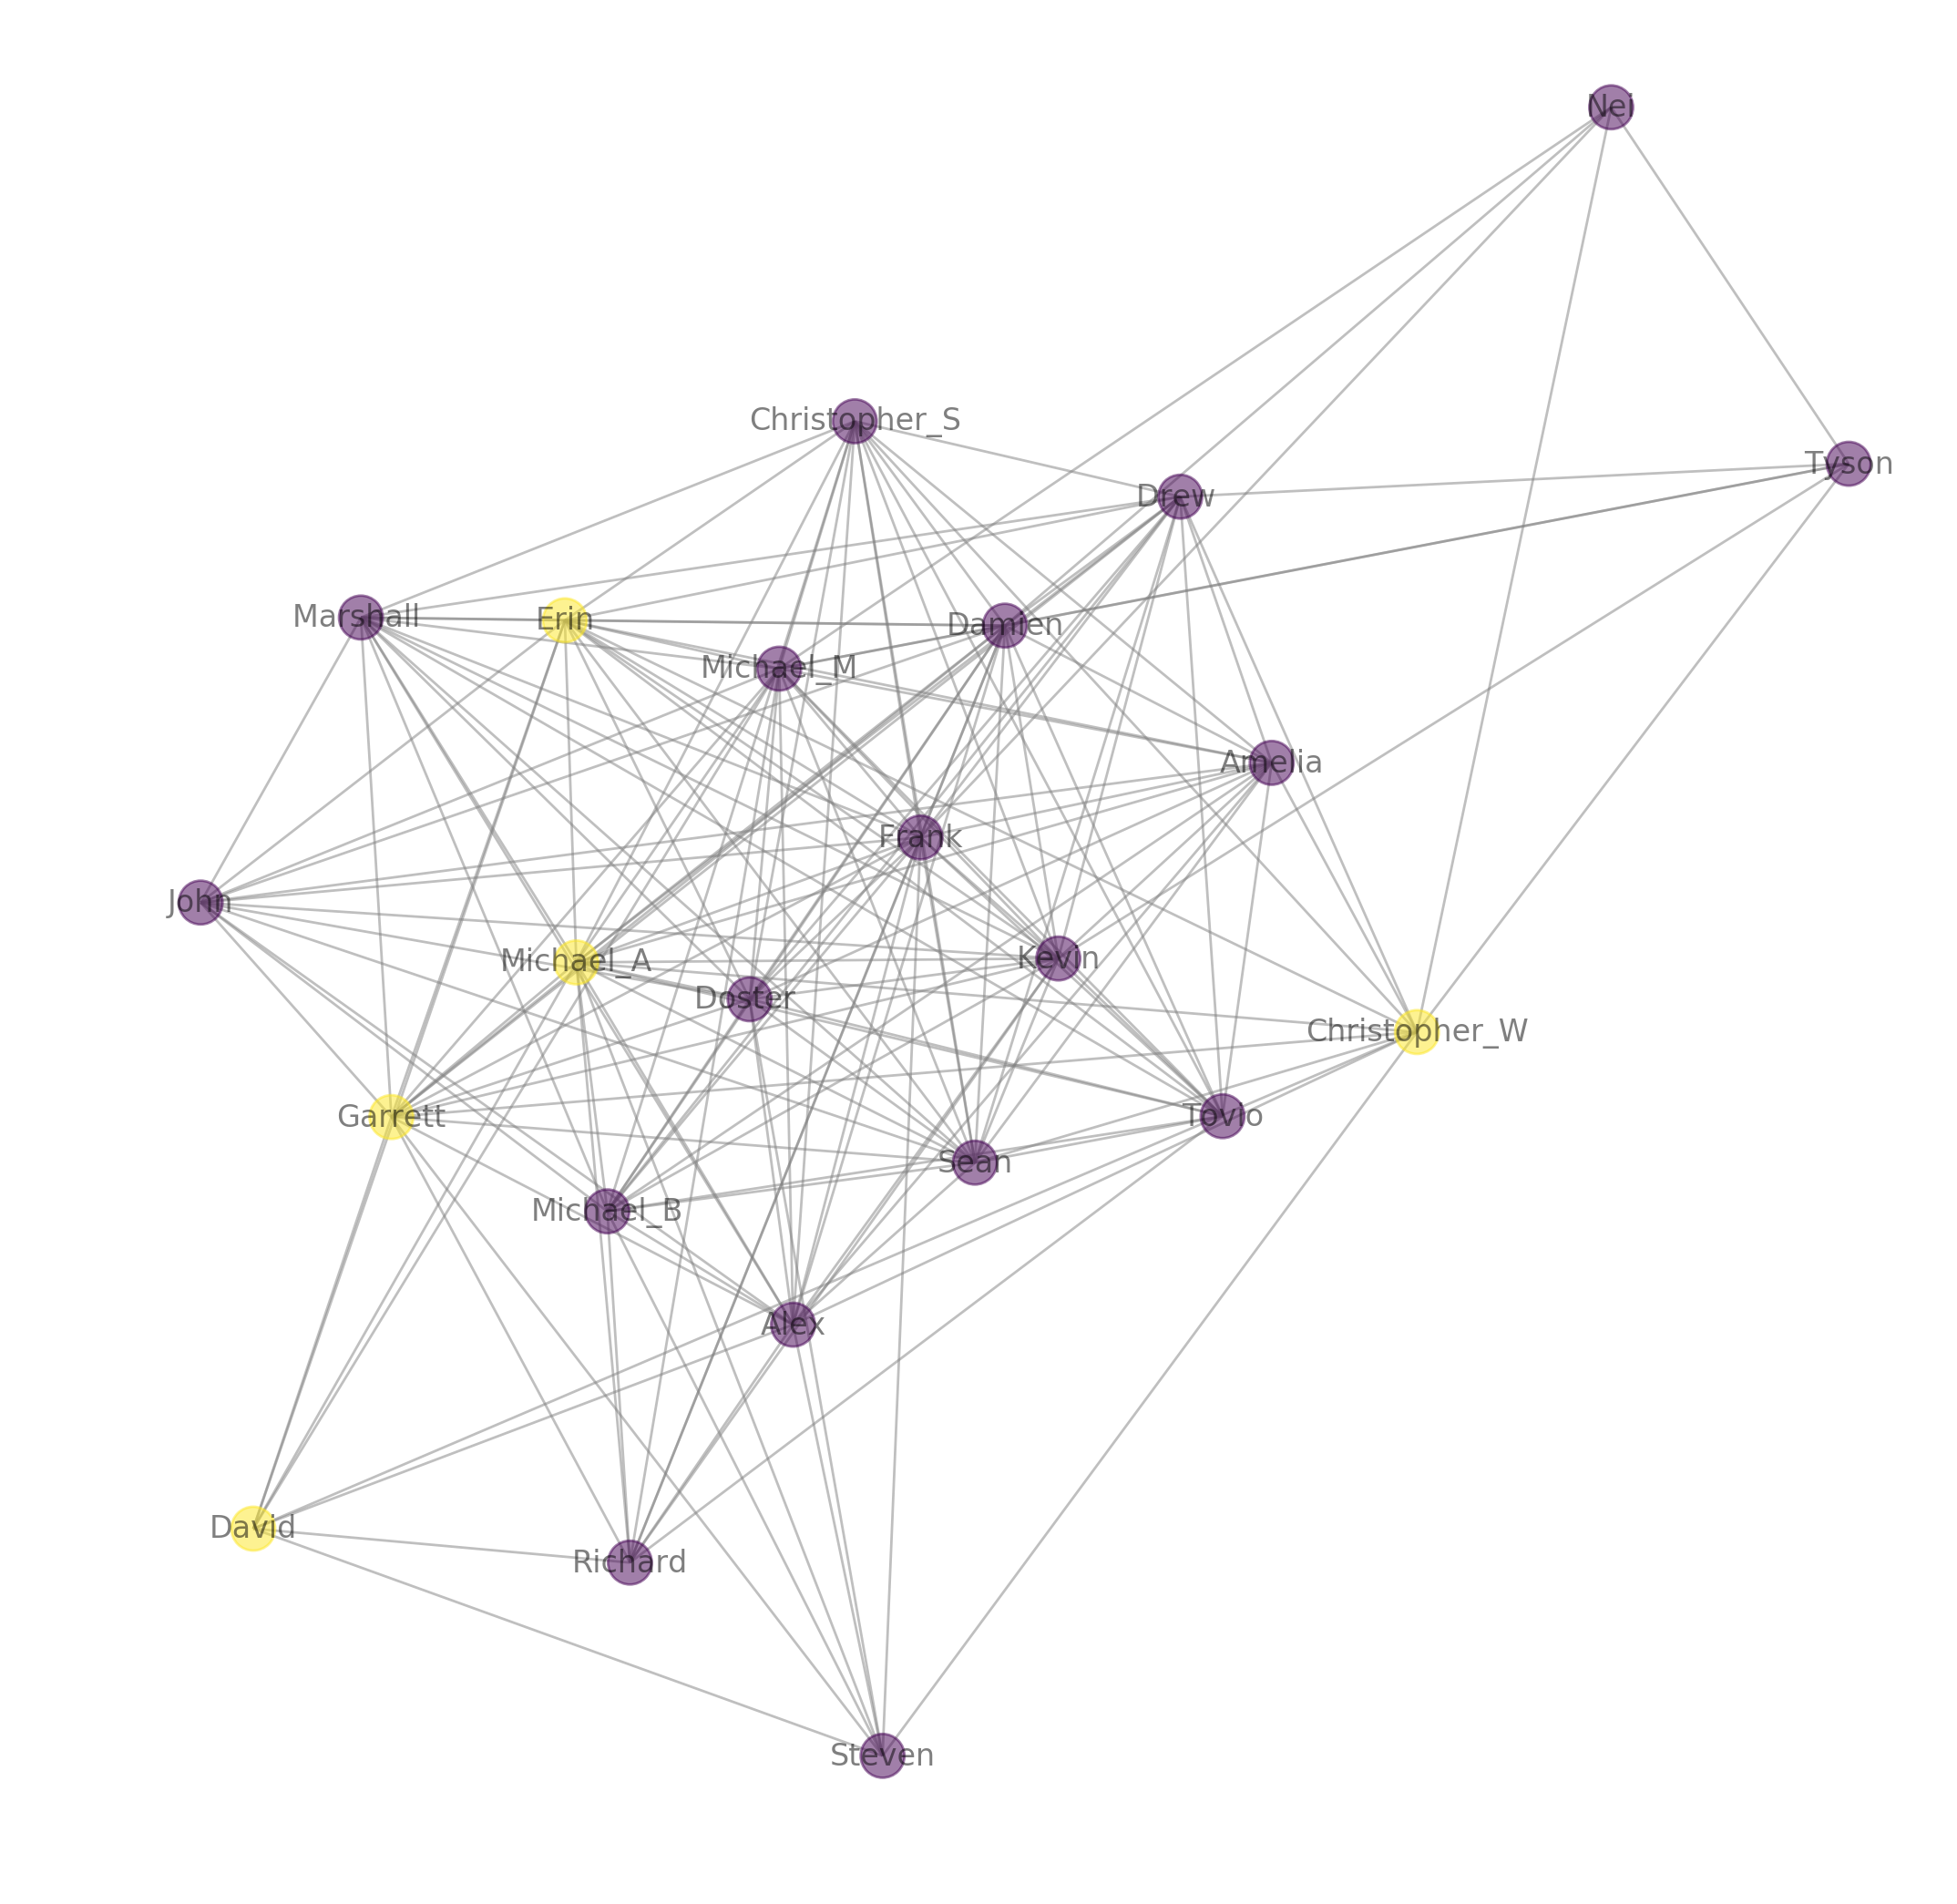

In [33]:
plt.figure(figsize=(10,10), dpi=200)
nx.draw(G, with_labels=True, alpha=0.5, node_color=[1 if node in clique else 0 for node in G.nodes()], edge_color='gray')